<a href="https://colab.research.google.com/github/Siddharth-Saravanan/Student_Depression_Analysis_and_Prediction_using_Machine_Learning/blob/main/student_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Depression Prediction Using Machine Learning**
---

## **Importing Libraries**

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## **Data Loading and Cleaning**

In [144]:
# Loading Data
depr_df = pd.read_csv('student_depression_dataset.csv')
depr_df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [145]:
# Dimensions of Data
depr_df.shape

(27901, 18)

In [146]:
# Overall Info about the dataset
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [147]:
# Checking for extreme cases of null values
depr_df.apply(lambda x: x.isin(['', 'NA', 'null', 'None'])).sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

### Categorical Values Check

In [148]:
depr_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [149]:
depr_df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Notice the anomalies in `City` column such as **`M.Tech, Saanvi, 3.0, Less than 5 Kalyan`** and so much more... <br>

These are needed to be cleaned

In [150]:
depr_df['City'].value_counts()

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

These anomalous values occur with very low frequency and are likely the result of incorrect or inconsistent data entry. Given their minimal representation, removing them manually has negligible impact on the overall dataset quality and ensures more consistent downstream analysis.

In [151]:
# List of invalid city values (including the typo 'Khaziabad')
invalid_cities = [
    'Saanvi', 'Bhavna', 'City', 'Harsha', "'Less Delhi'", 'M.Tech', '3.0',
    "'Less than 5 Kalyan'", 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
    'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'
]

depr_df = depr_df[~depr_df['City'].isin(invalid_cities)].copy()

In [152]:
print("Shape after removing invalid city values:", depr_df.shape)

Shape after removing invalid city values: (27875, 18)


In [153]:
depr_df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [154]:
depr_df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In the `Profession` column, we observe that some values include single quotes as part of the string itself, like **`'Civil Engineer'`** or **`'UX/UI Designer'`**. <br>
This is likely due to inconsistent formatting in the original CSV — for example, entries wrapped in single quotes may be preserved as string literals with quotes inside. <br>

When **pandas** reads these values, it preserves those ***inner single quotes***, and wraps the entire string in ***double quotes*** for display in Python. This leads to visual and categorical inconsistency, which should be cleaned before further analysis.

In [155]:
# Replacing single quotes with empty string
depr_df['Profession'] = depr_df['Profession'].str.replace("'", "")

In [156]:
depr_df['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

However, the other professions apart from Student have less frequency which will addressed after reviewing other dependent columns like `Work Pressure` and `Job Satisfaction`

In [157]:
depr_df['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [158]:
depr_df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

`Sleep Duration` has inconsistent formatting due to extra quotation marks, similar to the `Profession` column.

In [159]:
# Replacing single quotes with empty string
depr_df['Sleep Duration'] = depr_df['Sleep Duration'].str.replace("'", '')

The `"Others"` category does not represent a valid duration range and needs to be removed to maintain categorical consistency.

In [160]:
# Determining instances of 'Others' in `Sleep Duration` column
(depr_df['Sleep Duration'] == 'Others').sum()

18

In [161]:
# Removing rows with 'Others'
depr_df = depr_df[depr_df['Sleep Duration'] != 'Others'].copy()
depr_df.shape

(27857, 18)

In [162]:
depr_df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours'],
      dtype=object)

In [163]:
depr_df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

Similarly, `Dietary Habits` column has a category `'Others'` which doesn't fit in as the other 3 categories cover all cases. Due to its unclear meaning and low frequency, it is removed to maintain consistency.

In [164]:
# Determining instances of 'Others' in `Dietary Habits` column
(depr_df['Dietary Habits'] == 'Others').sum()

12

In [165]:
# Removing rows with 'Others'
depr_df = depr_df[depr_df['Dietary Habits'] != 'Others'].copy()
depr_df.shape

(27845, 18)

In [166]:
depr_df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

Here, `Degree` column just has a minor naming anomaly, which is the presence of additional quotes in value `'Class 12'`

In [167]:
depr_df['Degree'] = depr_df['Degree'].str.replace("'","")
depr_df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

Next, we check the distribution of `Degree` to identify and potentially remove underrepresented degree categories.

In [168]:
depr_df['Degree'].value_counts()

Degree
Class 12    6074
B.Ed        1862
B.Com       1503
B.Arch      1476
BCA         1430
MSc         1187
B.Tech      1151
MCA         1041
M.Tech      1019
BHM          924
BSc          886
M.Ed         817
B.Pharm      809
M.Com        734
BBA          696
MBBS         695
LLB          669
BE           609
BA           595
M.Pharm      581
MD           571
MBA          560
MA           544
PhD          520
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [169]:
depr_df = depr_df[depr_df['Degree']!='Others'].copy()
depr_df.shape

(27810, 18)

In [170]:
depr_df['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [171]:
depr_df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

The column names of the above 2 columns seems to be longer, so we rename them to a user-friendly version

In [172]:
# Renaming Columns
depr_df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts',
    'Family History of Mental Illness': 'FamilyMentalHistory'
}, inplace=True)

In [173]:
depr_df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'SuicidalThoughts',
       'Work/Study Hours', 'Financial Stress', 'FamilyMentalHistory',
       'Depression'],
      dtype='object')

### Numerical Columns Check

In [174]:
# Summary Statistics
depr_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000
mean,70456.223085,25.819705,3.141784,0.000431,7.656055,2.944049,0.000683,7.160338,0.585509
std,40648.525075,4.906776,1.381829,0.044064,1.470850,1.360970,0.044467,3.706733,0.492643
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35047.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70722.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105827.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


First, the `id` column is dropped as it does not provide any relevant information for the analysis

In [175]:
depr_df.drop(columns='id', inplace=True)
depr_df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'SuicidalThoughts',
       'Work/Study Hours', 'Financial Stress', 'FamilyMentalHistory',
       'Depression'],
      dtype='object')

From the summary statistics, both `Work Pressure` and `Job Satisfaction` have near-zero mean and very low standard deviation.
This suggests extreme skewness toward zero, warranting further inspection of their value distribution.

In [176]:
# Check Work Pressure column
(depr_df['Work Pressure'].value_counts(normalize=True) * 100).round(2)

Work Pressure
0.0    99.99
5.0     0.01
2.0     0.00
Name: proportion, dtype: float64

In [177]:
# Check Job Satisfaction column
(depr_df['Job Satisfaction'].value_counts(normalize=True) * 100).round(2)

Job Satisfaction
0.0    99.97
2.0     0.01
4.0     0.01
1.0     0.01
3.0     0.00
Name: proportion, dtype: float64

The `Work Pressure` and `Job Satisfaction` columns show extreme imbalance, with ~99.9% values concentrated at 0.
Such skewed distribution limits their predictive power and may require removal or special handling.

Also, we discussed about `Profession` column having less frequency for other jobs than `Student`, and a possible correlation with these 2 columns. Let us explore

In [178]:
# Selecting Profession, Work Pressure and Job Saisfaction columns and arranging them in descending order by Work Pressure and Job Satisfaction columns
depr_df.loc[:,['Profession','Work Pressure','Job Satisfaction']].sort_values(by=['Work Pressure','Job Satisfaction'],ascending=[False,False]).head(10)

,Profession,Work Pressure,Job Satisfaction
4365,Student,5.0,4.0
25746,Student,5.0,4.0
14855,Student,2.0,1.0
292,Student,0.0,3.0
13909,Student,0.0,2.0
23141,Student,0.0,2.0
26719,Student,0.0,2.0
20913,Student,0.0,1.0
0,Student,0.0,0.0
1,Student,0.0,0.0


Well, looks like only the **Students**, that too only 8 of them have either `Work Pressure` or `Job Satisfaction` !!!

Then what is the scenario for other Professions?

In [179]:
# Excluding student records and selecting Profession, Work Pressure and Job Saisfaction columns
depr_df[~depr_df['Profession'].isin(['Student'])].loc[:,['Profession','Work Pressure','Job Satisfaction']]

,Profession,Work Pressure,Job Satisfaction
113,Civil Engineer,0.0,0.0
422,Architect,0.0,0.0
1845,UX/UI Designer,0.0,0.0
2249,Digital Marketer,0.0,0.0
2440,Content Writer,0.0,0.0
3220,Architect,0.0,0.0
3388,Architect,0.0,0.0
3639,Educational Consultant,0.0,0.0
3841,Teacher,0.0,0.0
5016,Teacher,0.0,0.0


In [180]:
depr_df[~depr_df['Profession'].isin(['Student'])].loc[:,['Profession','Work Pressure','Job Satisfaction']].shape

(31, 3)

Out of 31 records who have another profession, none of them are subject to `Work Pressure` and `Job Satisfaction`.

Hence, we will restrict our analysis to student records only, and drop the `Profession`, `Work Pressure`, and `Job Satisfaction` columns.

In [181]:
# Subsetting only student records and dropping Profession, Work Pressure and Job Satisfaction
depr_df = depr_df[depr_df['Profession'] == 'Student'].copy()
depr_df.drop(columns=['Profession','Work Pressure','Job Satisfaction'], inplace=True)
print("Updated shape:",depr_df.shape)
depr_df.columns

Updated shape: (27779, 14)


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'SuicidalThoughts', 'Work/Study Hours', 'Financial Stress',
       'FamilyMentalHistory', 'Depression'],
      dtype='object')

In [182]:
# Revisit summary statistics
depr_df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Depression
count,27779.000000,27779.000000,27779.000000,27779.000000,27779.000000,27779.000000
mean,25.818532,3.141186,7.655979,2.943770,7.161309,0.585154
std,4.907666,1.382005,1.470978,1.361032,3.706267,0.492704
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.280000,2.000000,4.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,1.000000


<!-- Also, observe that `Financial Stress` column is missing from the summary statistics. <br> -->
Coming back to the summary statistics, notice that `Financial Stress` column is missing.<br>
This is because, it has an `object` datatype, indicating that the values are stored as strings rather than numerical types — even though they represent float values.

In [183]:
# Check datatype of Financial Stress column
depr_df['Financial Stress'].dtype

dtype('O')

In [184]:
# Converting string to float using astype()
try:
  depr_df['Financial Stress'] = depr_df['Financial Stress'].astype(float)
except ValueError as e:
  print(e)

could not convert string to float: '?'


Although `astype()` should have worked for converting strings to floats, it raised an error due to the presence of an invalid entry `'?'`

To confirm this, the unique method was used to inspect all distinct values in the column.

In [185]:
depr_df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [186]:
# Check no. of instances of '?'
depr_df['Financial Stress'].value_counts()

Financial Stress
5.0    6680
4.0    5754
3.0    5204
1.0    5093
2.0    5045
?         3
Name: count, dtype: int64

As only 3 records contained the value of `'?'`, they are removed

In [187]:
# Removing rows with '?'
depr_df = depr_df[depr_df['Financial Stress'] != '?'].copy()
depr_df.shape

(27776, 14)

Now the conversion of `Financial Stress` column from `object` to `float` is tried again using `astype()`

In [188]:
# Converting string to float using astype()
try:
  depr_df['Financial Stress'] = depr_df['Financial Stress'].astype(float)
except ValueError as e:
  print(e)

In [189]:
# Check Datatype of Financial Stress column
depr_df['Financial Stress'].dtype

dtype('float64')

In [190]:
# Verify changes in distribution
depr_df['Financial Stress'].value_counts().sort_index()

Financial Stress
1.0    5093
2.0    5045
3.0    5204
4.0    5754
5.0    6680
Name: count, dtype: int64

Now let us check `Study Satisfaction` column. Well, it looks like only 10 students aren't satisfied with studying.<br>
The `Study Satisfaction` column contains 10 rare occurrences of the value `0`, which is inconsistent with the rest of the data that ranges from 1 to 5.

In [191]:
# Check Study Satisfaction column
depr_df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6330
2.0    5816
3.0    5795
1.0    5423
5.0    4402
0.0      10
Name: count, dtype: int64

Similarly, there are only 9 students with no `Academic Pressure` at all <br>
The `Academic Pressure` column includes 9 records with a value of `0`, which deviates from the otherwise consistent 1–5 pattern observed.


In [192]:
# Check Study Satisfaction column
depr_df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7419
5.0    6272
4.0    5135
1.0    4786
2.0    4155
0.0       9
Name: count, dtype: int64

Thus, records containing `0` in either `Study Satisfaction` or `Academic Pressure` are removed to maintain consistency and avoid ambiguity in further analysis.


In [193]:
# Remove rows with 0 in either Study Satisfaction or Academic Pressure
depr_df = depr_df[(depr_df['Study Satisfaction'] != 0) & (depr_df['Academic Pressure'] != 0)].copy()
depr_df.shape

(27764, 14)

#### **Summary**

All ordinal categorical columns such as `Financial Stress`, `Academic Pressure`, and `Study Satisfaction` were checked for anomalies (e.g., invalid 0s or placeholders like '?') and cleaned accordingly.  
Continuous numerical variables including `Age`, `CGPA`, and `Work/Study Hours` would be reviewed in EDA stage for outliers and data integrity.

The variables `Profession`, `Work Pressure`, and `Job Satisfaction` were excluded from the dataset due to high imbalance and near-zero variance, rendering them uninformative for modeling.

Further exploration of continuous variable distributions and outlier detection will be performed in the subsequent EDA section.

### **Exploratory Data Analysis**

### Summary Statistics

In [194]:
# Check summary statistics
depr_df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27764.000000,27764.000000,27764.000000,27764.000000,27764.000000,27764.000000,27764.000000
mean,25.818578,3.142163,7.658221,2.945001,7.161684,3.139677,0.585182
std,4.906478,1.381044,1.466058,1.360140,3.705796,1.436932,0.492699
min,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [195]:
depr_df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyMentalHistory,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Univariate Analysis

In [196]:
depr_df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'SuicidalThoughts', 'Work/Study Hours', 'Financial Stress',
       'FamilyMentalHistory', 'Depression'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1e7a4f7cd70>,
 [Text(-0.19683937769764256, 1.0822450089455737, 'Male'),
  Text(0.19683927637055082, -1.0822450273750015, 'Female')],
 [Text(-0.1073669332896232, 0.5903154594248584, '55.7%'),
  Text(0.10736687802030044, -0.5903154694772735, '44.3%')])

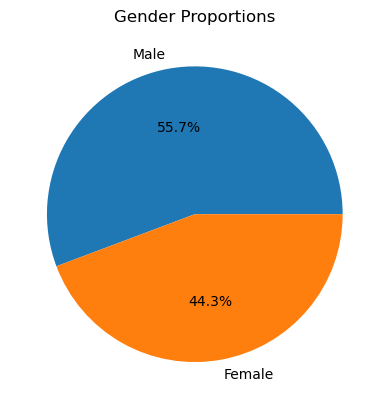

In [197]:
# Gender

plt.title('Gender Proportions')
plt.pie(depr_df['Gender'].value_counts(), labels=depr_df['Gender'].unique(), autopct='%1.1f%%')

**Males** are slightly higher in number than **Females** with a ratio of approximately **56:44**

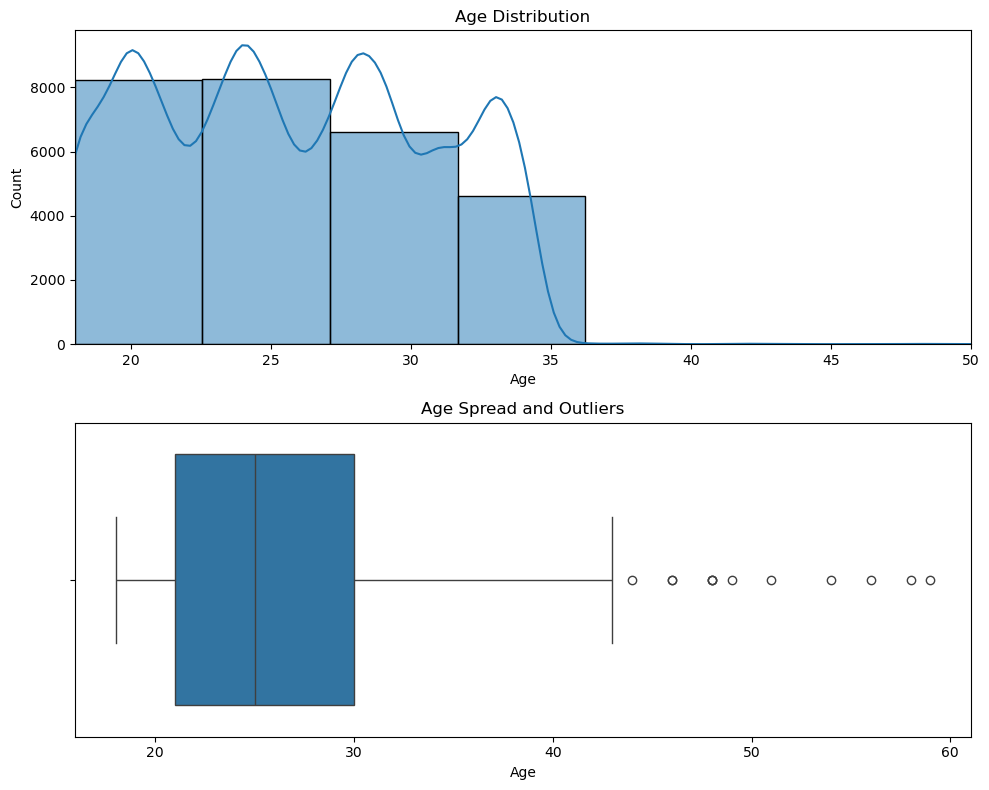

In [198]:
# Age Distribution and Boxplot

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram with KDE
sns.histplot(depr_df['Age'], bins=9, kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")
axs[0].set_xlim(18, 50)

# Boxplot
sns.boxplot(data=depr_df, x='Age', ax=axs[1])
axs[1].set_title("Age Spread and Outliers")

plt.tight_layout()
plt.show()


The majority of students are between **early 20s** and **early 30s**, with a few older students above 40 considered **outliers**. No extreme young ages were observed

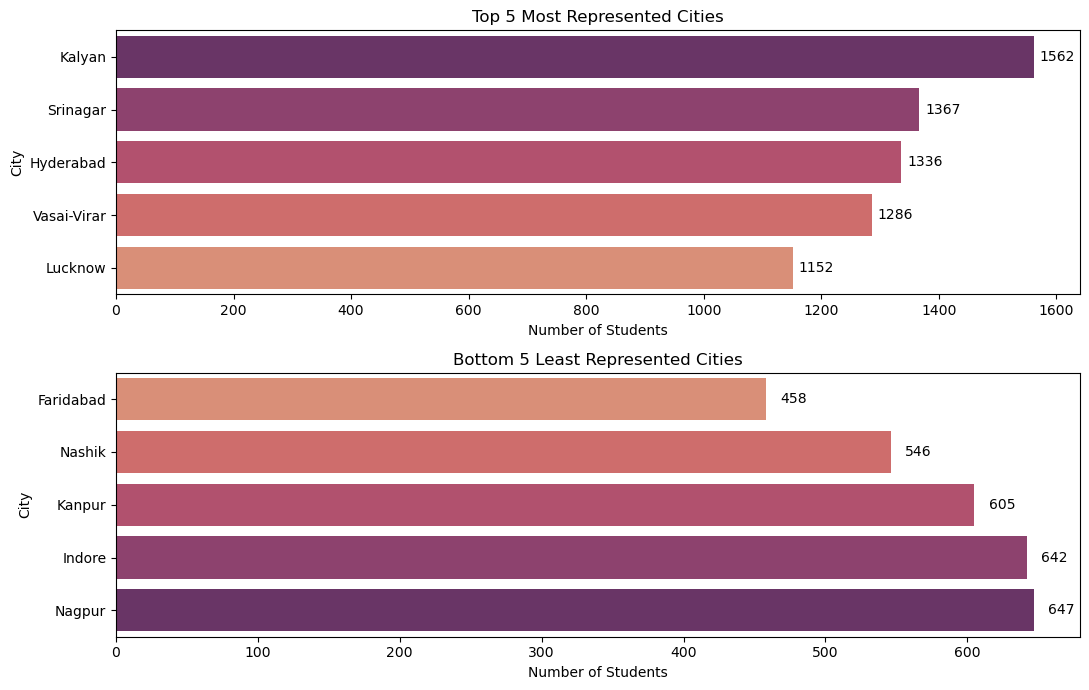

In [199]:
# Top 5 and Bottom 5 Cities

city_counts = depr_df['City'].value_counts()

top5_cities = city_counts.head(5)
bottom5_cities = city_counts.tail(5).sort_values(ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(11, 7))

sns.barplot(x=top5_cities.values, y=top5_cities.index, ax=ax[0], hue=top5_cities.index, palette="flare_r")
ax[0].set_title("Top 5 Most Represented Cities")
ax[0].set_xlabel("Number of Students")
ax[0].set_ylabel("City")

for i, v in enumerate(top5_cities.values):
    ax[0].text(v + 10, i, str(v), color='black', va='center')

sns.barplot(x=bottom5_cities.values, y=bottom5_cities.index, ax=ax[1], hue=bottom5_cities.index, palette="flare")
ax[1].set_title("Bottom 5 Least Represented Cities")
ax[1].set_xlabel("Number of Students")
ax[1].set_ylabel("City")

for i, v in enumerate(bottom5_cities.values):
    ax[1].text(v + 10, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


**Kalyan** has the highest number of students (**1,563**), followed by **Srinagar** (**1,370**) and **Hyderabad** (**1,337**),  
whereas **Faridabad** (**459**), **Nashik** (**547**), and **Kanpur** (**606**) have the least representation.

Text(0, 0.5, 'Number of Students')

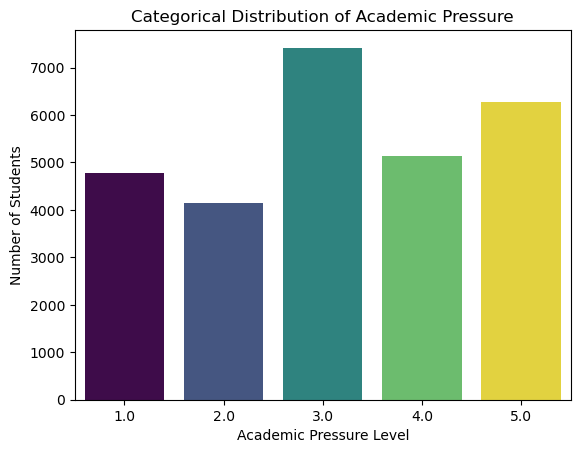

In [200]:
# Academic Pressure Category Distribution

sns.countplot(data=depr_df, x='Academic Pressure', hue='Academic Pressure', palette='viridis', legend=False)
plt.title("Categorical Distribution of Academic Pressure")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")

Majority of students report moderate to high academic pressure (3–5)

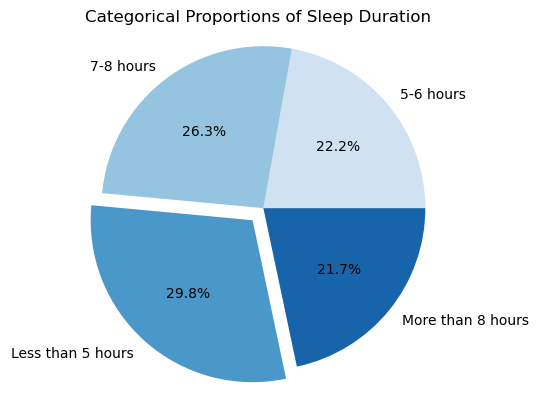

In [201]:
# Sleep Duration Proportions

colors = sns.color_palette("Blues", n_colors=len(depr_df['Sleep Duration'].unique()))

sleep_counts = depr_df['Sleep Duration'].value_counts().sort_index()

explode = [0, 0, 0.1, 0]
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode)
plt.axis('equal')
plt.title("Categorical Proportions of Sleep Duration")
plt.show()


Almost **30%** of the students, sleep `Less than 5 hours`, making it the most common sleep duration among all categories, followed by `7-8 hours` with approximately **26%**

<Axes: xlabel='FamilyMentalHistory', ylabel='count'>

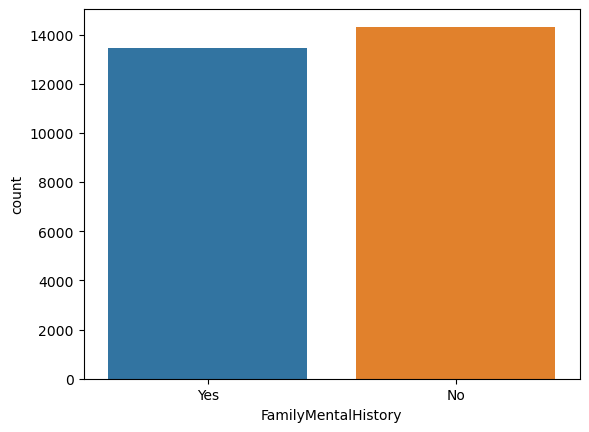

In [202]:
order = ["Yes", "No"]
palette = {"Yes": "#1f77b4", "No": "#ff7f0e"}

sns.countplot(
    data=depr_df,
    x="FamilyMentalHistory",
    order=order,
    hue="FamilyMentalHistory",
    palette=palette,
    legend=False
)

Responses for family mental health history are almost evenly split, with slightly more students reporting no history compared to those who do.

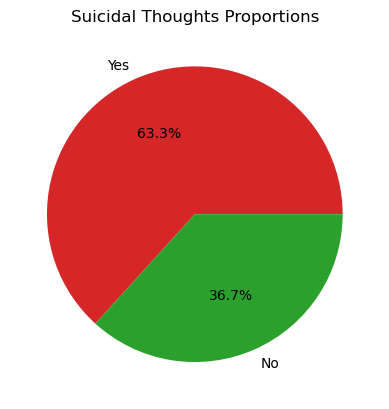

In [203]:
plt.pie(
    depr_df['SuicidalThoughts'].value_counts(),
    labels=depr_df['SuicidalThoughts'].unique(),
    autopct='%1.1f%%',
    colors=["#d62728", "#2ca02c"],
)
plt.title("Suicidal Thoughts Proportions")
plt.show()

Almost **63%** of the students reported having `Suicidal Thoughts`! indicating it is the majority response

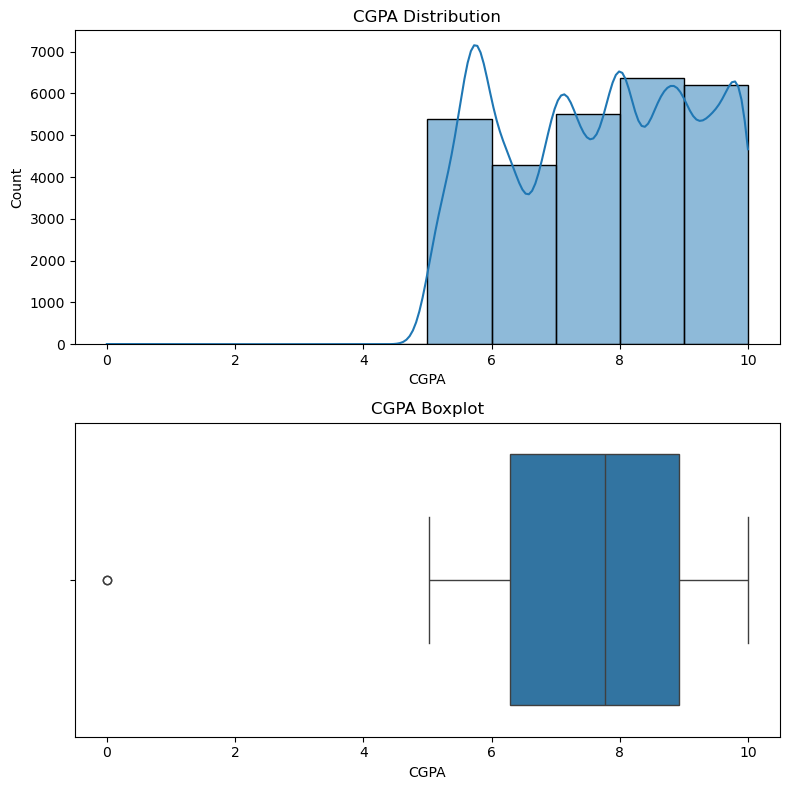

In [204]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(data=depr_df, x='CGPA', bins=10, kde=True, ax=axs[0])
axs[0].set_title("CGPA Distribution")

sns.boxplot(data=depr_df, x='CGPA', ax=axs[1])
axs[1].set_title("CGPA Boxplot")

plt.tight_layout()
plt.show()


While the common range of CGPA is from approx 6 to 9, we have an outlier at 0, which is unrealistic for a student.
So we further check the dataframe

In [205]:
# Checking outliers in CGPA

depr_df[depr_df['CGPA']<2]

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyMentalHistory,Depression
10407,Male,28.0,Vadodara,3.0,0.0,4.0,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
21805,Male,34.0,Pune,1.0,0.0,5.0,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0


Looks like 2 students, either forgot to fill in the CGPA or they really did get 0.0 CGPA! As there are only 2 records, we drop them

In [206]:
# Removing rows with CGPA equal to 0

depr_df = depr_df[depr_df['CGPA']!=0].copy()
depr_df.shape

(27762, 14)

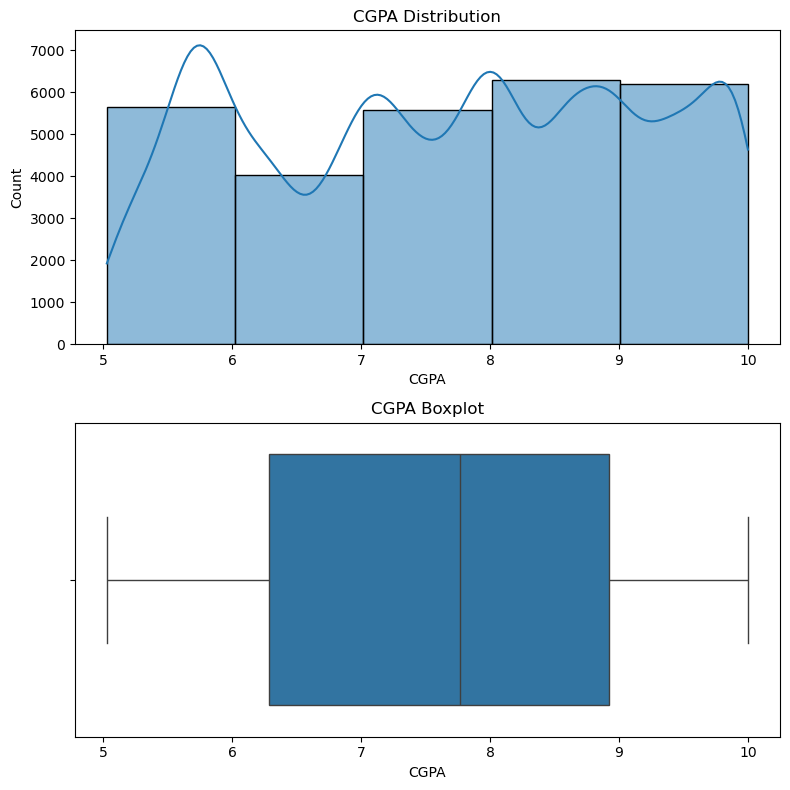

In [207]:
# Re-plotting CGPA Distribution and Boxplot after removing outliers
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(data=depr_df, x='CGPA', bins=5, kde=True, ax=axs[0])
axs[0].set_title("CGPA Distribution")

sns.boxplot(data=depr_df, x='CGPA', ax=axs[1])
axs[1].set_title("CGPA Boxplot")

plt.tight_layout()
plt.show()

Now, we can observe the refined plots after excluding outliers.

Thus the `CGPA` distribution is primarily **between 6 and 9**, with a median around **8**.

Text(0.5, 1.0, 'Categorical Distribution of Work/Study Hours')

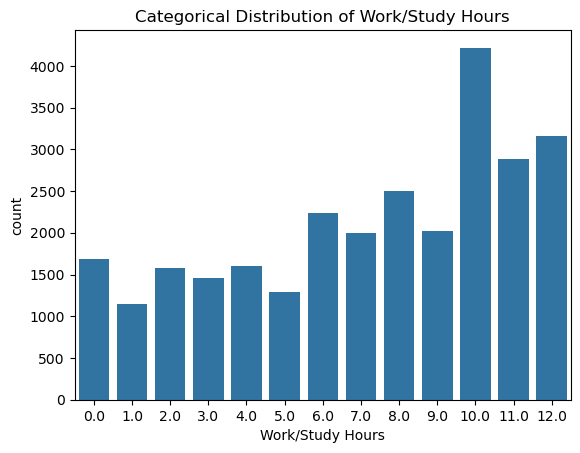

In [208]:
# Categorical Distribution of Work/Study Hours

sns.countplot(data=depr_df, x='Work/Study Hours')
plt.title("Categorical Distribution of Work/Study Hours")

The distribution of Work/Study Hours spans 13 individual categories, which limits pattern recognition and interpretability.  
Grouping these hours into broader ranges (e.g., **0–4**, **5–8**, **9–12**) would provide clearer and more actionable insights.

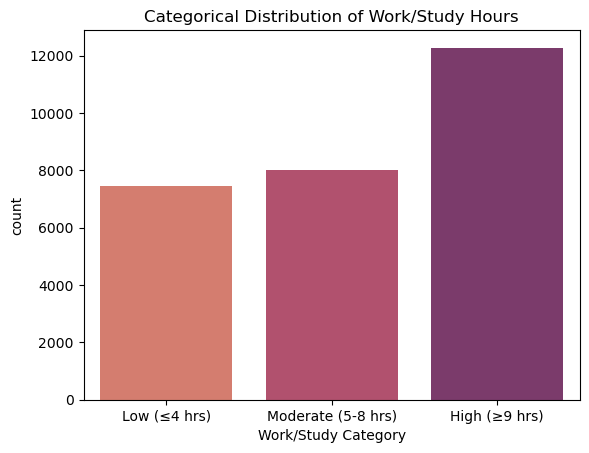

In [209]:
bins = [-1, 4, 8, 12]
labels = ['Low (≤4 hrs)', 'Moderate (5-8 hrs)', 'High (≥9 hrs)']
depr_df['Work/Study Category'] = pd.cut(depr_df['Work/Study Hours'], bins=bins, labels=labels)

sns.countplot(data=depr_df, x='Work/Study Category', order=labels, palette='flare', hue='Work/Study Category', legend=False)
plt.title("Categorical Distribution of Work/Study Hours")
plt.show()


Text(0.5, 1.0, 'Work/Study Hours Proportions')

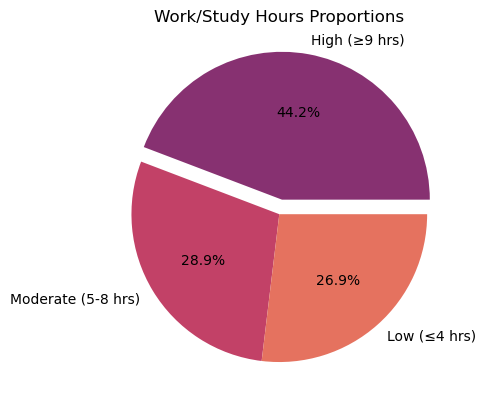

In [210]:
# Pie-chart visualization of Work/Study Hours Proportions

colors = sns.color_palette("flare_r", n_colors=len(depr_df['Work/Study Category'].unique()))

plt.pie(
    depr_df['Work/Study Category'].value_counts(),
    labels=depr_df['Work/Study Category'].unique().sort_values(ascending=False),
    autopct='%1.1f%%',
    explode=(0.1, 0, 0),
    colors=colors
)
plt.title("Work/Study Hours Proportions")

A significant number of students (**>12,000**) report studying for **9 or more hours daily**, indicating a high academic workload for a large portion of the population.

Text(0.5, 1.0, 'Categorical Distribution of Dietary Habits')

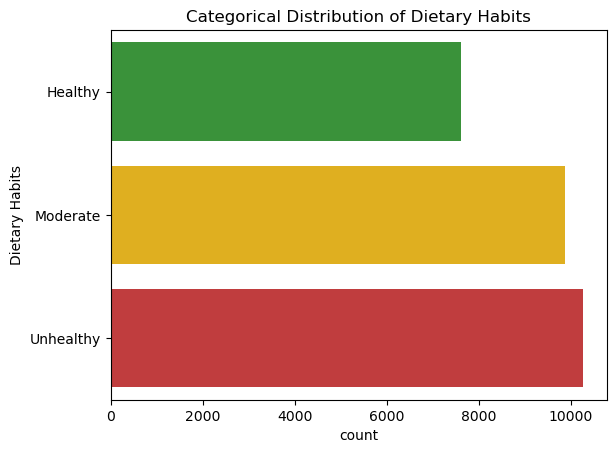

In [211]:
# Categorical Distribution of Dietary Habits

palette = {
    "Healthy": "#2ca02c",   # green
    "Moderate": "#ffbf00",  # yellow
    "Unhealthy": "#d62728"  # red
}

sns.countplot(data=depr_df, y='Dietary Habits',palette=palette, hue='Dietary Habits', legend=False)
plt.title("Categorical Distribution of Dietary Habits")

Over **10000+** students are following a `Unhealthy` dietary routine, making it the most common among them.

#### **Summary**

The univariate analysis shows that:
- Students generally fall in typical academic age and CGPA ranges.
- Sleep and diet patterns highlight possible lifestyle concerns (low sleep, unhealthy eating).
- A significant proportion report suicidal thoughts, which may require deeper analysis in relation to other variables.

### Bivariate Analysis

In [212]:
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27762 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               27762 non-null  object  
 1   Age                  27762 non-null  float64 
 2   City                 27762 non-null  object  
 3   Academic Pressure    27762 non-null  float64 
 4   CGPA                 27762 non-null  float64 
 5   Study Satisfaction   27762 non-null  float64 
 6   Sleep Duration       27762 non-null  object  
 7   Dietary Habits       27762 non-null  object  
 8   Degree               27762 non-null  object  
 9   SuicidalThoughts     27762 non-null  object  
 10  Work/Study Hours     27762 non-null  float64 
 11  Financial Stress     27762 non-null  float64 
 12  FamilyMentalHistory  27762 non-null  object  
 13  Depression           27762 non-null  int64   
 14  Work/Study Category  27762 non-null  category
dtypes: category(1), float64(

In [213]:
depr_df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyMentalHistory,Depression,Work/Study Category
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,Low (≤4 hrs)
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,Low (≤4 hrs)
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,High (≥9 hrs)
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,Low (≤4 hrs)
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,Low (≤4 hrs)


**Do males have a higher depression rate than females ?**

In [214]:
gender_dep = depr_df.groupby('Gender')['Depression'].agg(['sum','count'])
gender_dep['Depression Rate (%)'] = ((gender_dep['sum']/gender_dep['count']) * 100).round(2)
gender_dep

,sum,count,Depression Rate (%)
Gender,,,
Female,7182,12292,58.43
Male,9065,15470,58.60


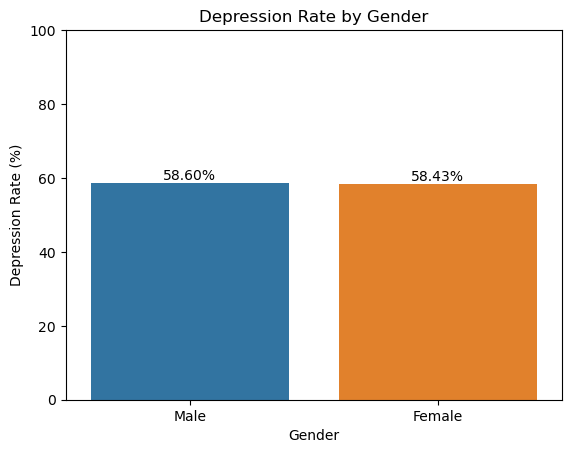

In [215]:
ax = sns.barplot(
        data = gender_dep.reset_index(),
        x = 'Gender',
        y = 'Depression Rate (%)',
        hue = 'Gender',
        order=['Male','Female'],
        hue_order=['Male','Female'],
    )


for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")

plt.title('Depression Rate by Gender')
plt.ylim(0, 100)
plt.show()

Male and female students have similar depression rates **(~58%)**, indicating no significant gender difference in depression prevalence.

---

**Is academic pressure linked to depression differently for males and females ?**

In [216]:
acd_depr = depr_df.groupby(['Gender','Academic Pressure'])['Depression'].agg(['sum', 'count'])
acd_depr['Depression Rate (%)'] = ((acd_depr['sum'] / acd_depr['count']) * 100).round(2)
acd_depr


sum  count  Depression Rate (%)
Gender Academic Pressure                                  
Female 1.0                 371   2040                18.19
       2.0                 666   1836                36.27
       3.0                1929   3212                60.06
       4.0                1753   2322                75.50
       5.0                2463   2882                85.46
Male   1.0                 557   2745                20.29
       2.0                 890   2319                38.38
       3.0                2530   4206                60.15
       4.0                2157   2812                76.71
       5.0                2931   3388                86.51

Text(0.5, 0, 'Academic Pressure Level')

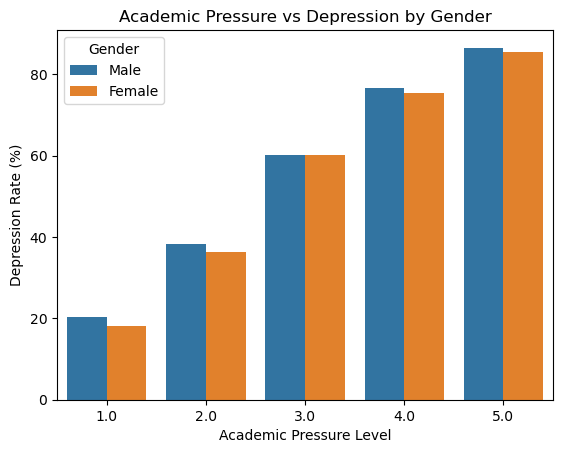

In [217]:
sns.barplot(
    data=acd_depr.reset_index(), 
    x='Academic Pressure', 
    y='Depression Rate (%)', 
    hue = 'Gender',
    hue_order=['Male','Female'],
)
plt.title("Academic Pressure vs Depression by Gender")
plt.xlabel("Academic Pressure Level")

Similar result can be achieved by directly inserting the features in `seaborn.barplot` function

Only difference is the below plot represents Depression in proportions **(0-1)**

Text(0.5, 0, 'Academic Pressure Level')

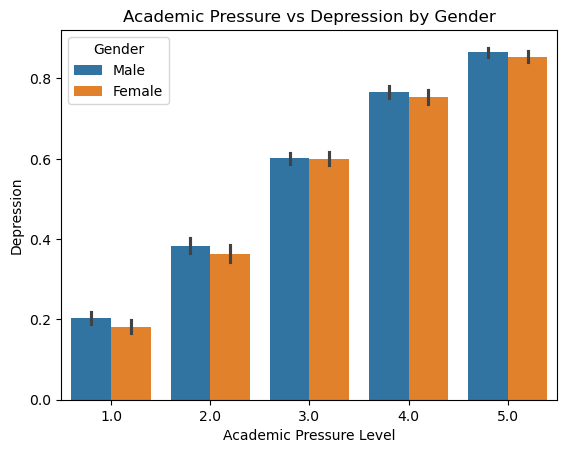

In [218]:
sns.barplot(data=depr_df, x='Academic Pressure', y='Depression', hue='Gender')
plt.title("Academic Pressure vs Depression by Gender")
plt.xlabel("Academic Pressure Level")

Thus, Depression Rates show a constant increase with increase of `Academic Pressure`, with Males having slightly higher rates than that of Females.

---

**Are younger students experiencing high academic pressure more likely to be depressed?**

In [219]:
# Creating Age Buckets
age_acd_depr = depr_df.loc[:, ['Age', 'Academic Pressure', 'Depression']].copy()
age_bins = [17, 22, 27, 32, 60]
age_labels = ['18-22', '23-27', '28-32', '33+']
age_acd_depr['Age Bucket'] = pd.cut(age_acd_depr['Age'], bins=age_bins, labels=age_labels)

# Grouping by Age Bucket and Academic Pressure, calculating Depression Rate
age_acd_depr = age_acd_depr.groupby(['Age Bucket', 'Academic Pressure'], observed=False)['Depression'].agg(['sum', 'count'])
age_acd_depr['Depression Rate (%)'] = ((age_acd_depr['sum'] / age_acd_depr['count']) * 100).round(2)
age_acd_depr


sum  count  Depression Rate (%)
Age Bucket Academic Pressure                                  
18-22      1.0                 331   1325                24.98
           2.0                 539   1031                52.28
           3.0                1625   2210                73.53
           4.0                1390   1642                84.65
           5.0                1860   2031                91.58
23-27      1.0                 340   1405                24.20
           2.0                 538   1286                41.84
           3.0                1379   2102                65.60
           4.0                1248   1574                79.29
           5.0                1659   1898                87.41
28-32      1.0                 204   1315                15.51
           2.0                 374   1237                30.23
           3.0                1149   2162                53.15
           4.0                 942   1323                71.20
           5.0                1524   1824                83.55
33+        1.0                  53    740                 7.16
           2.0                 105    601                17.47
           3.0                 306    944                32.42
           4.0                 330    595                55.46
           5.0                 351    517                67.89

In [220]:
# Pivoting the DataFrame for Heatmap
age_acd_pivot = age_acd_depr.pivot_table(
    index='Age Bucket',
    columns='Academic Pressure',
    values='Depression Rate (%)',
    fill_value=0,
    observed=False
)
age_acd_pivot


Academic Pressure,1.0,2.0,3.0,4.0,5.0
Age Bucket,,,,,
18-22,24.98,52.28,73.53,84.65,91.58
23-27,24.20,41.84,65.60,79.29,87.41
28-32,15.51,30.23,53.15,71.20,83.55
33+,7.16,17.47,32.42,55.46,67.89


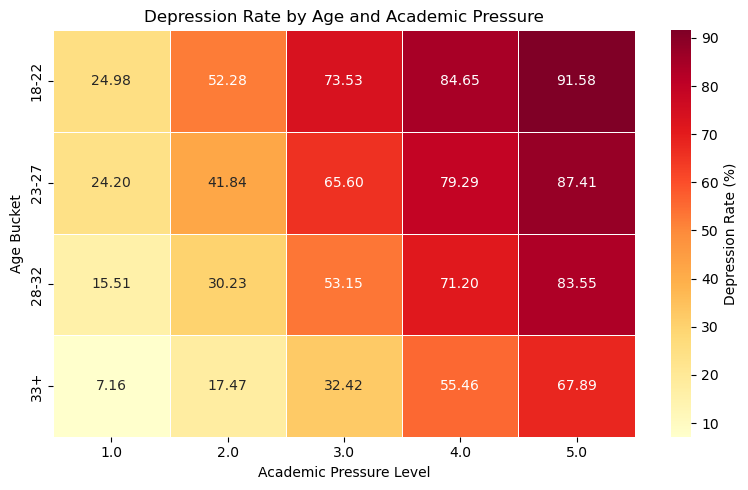

In [221]:
# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(age_acd_pivot, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Depression Rate (%)'}, linewidths=.5)
plt.title("Depression Rate by Age and Academic Pressure")
plt.ylabel("Age Bucket")
plt.xlabel("Academic Pressure Level")
plt.tight_layout()


Depression rates are highest among younger students (18–22) who report high academic pressure (levels 4 and 5), indicating academic workload may disproportionately affect early-stage students.

---

**Do students with higher financial stress levels have a higher likelihood of being depressed?**

In [222]:
age_fin_depr = depr_df.loc[:, ['Age', 'Financial Stress', 'Depression']]
age_fin_depr['Age Buckets'] = pd.cut(age_fin_depr['Age'], bins=age_bins, labels=age_labels)
age_fin_depr = age_fin_depr.groupby(['Age Buckets','Financial Stress'], observed=False)['Depression'].agg(['sum','count'])
age_fin_depr['Depression Rate (%)'] = ((age_fin_depr['sum'] / age_fin_depr['count'])*100).round(2)

# Pivot
age_fin_pivot = age_fin_depr.pivot_table(values = 'Depression Rate (%)', index='Age Buckets', columns='Financial Stress', observed=False)
age_fin_pivot

Financial Stress,1.0,2.0,3.0,4.0,5.0
Age Buckets,,,,,
18-22,43.44,52.97,70.01,78.50,88.06
23-27,34.90,47.38,61.56,72.55,83.09
28-32,29.70,38.35,54.81,63.64,78.04
33+,13.87,21.56,35.99,44.61,59.94


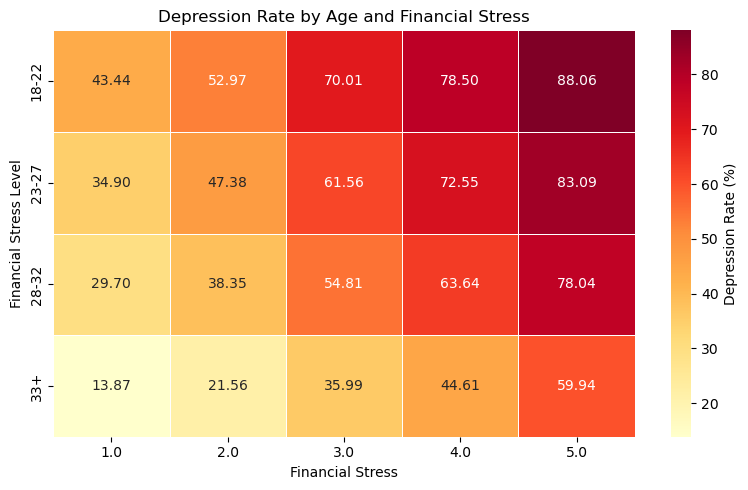

In [223]:
# Heatmap
plt.figure(figsize=(8,5))

sns.heatmap(
    data = age_fin_pivot,
    annot = True,
    fmt = '.2f',
    cmap = 'YlOrRd',
    cbar_kws = {'label': 'Depression Rate (%)'}, #
    linewidths=0.5
)

plt.title("Depression Rate by Age and Financial Stress")
plt.ylabel("Financial Stress Level")
plt.tight_layout()


Depression rates are highest among younger students **(18–22)** experiencing higher financial stress levels **(4 and 5)**, suggesting a possible association between financial stress and mental health concerns.

---

**Are younger students with low CGPA more likely to be depressed than older students with low CGPA?**

In [224]:
# In this we assume low CGPA to be less than 6.5, as per standard norms
low_cgpa_depr = depr_df[depr_df['CGPA']<6.5].copy()
low_cgpa_depr['Age Bucket'] = pd.cut(low_cgpa_depr['Age'], bins = age_bins, labels = age_labels)
low_cgpa_depr = low_cgpa_depr.groupby(['Age Bucket','Depression'], observed = False)['Depression'].agg(['count'])

total_byAgeB = low_cgpa_depr.groupby('Age Bucket', observed=False)['count'].sum()

low_cgpa_depr['Percentage (%)'] = (((low_cgpa_depr['count']/total_byAgeB)* 100).round(2))
low_cgpa_depr

count  Percentage (%)
Age Bucket Depression                       
18-22      0             720           31.03
           1            1600           68.97
23-27      0             914           39.70
           1            1388           60.30
28-32      0            1071           49.47
           1            1094           50.53
33+        0             629           65.45
           1             332           34.55

In [225]:
low_cgpa_pivot = low_cgpa_depr.pivot_table(
    index='Age Bucket',
    columns='Depression',
    values='Percentage (%)',
    observed=False
)
low_cgpa_pivot = (low_cgpa_pivot / low_cgpa_pivot.sum()) * 100
low_cgpa_pivot

Depression,0,1
Age Bucket,,
18-22,16.714247,32.176347
23-27,21.384325,28.131561
28-32,26.646916,23.573595
33+,35.254511,16.118498


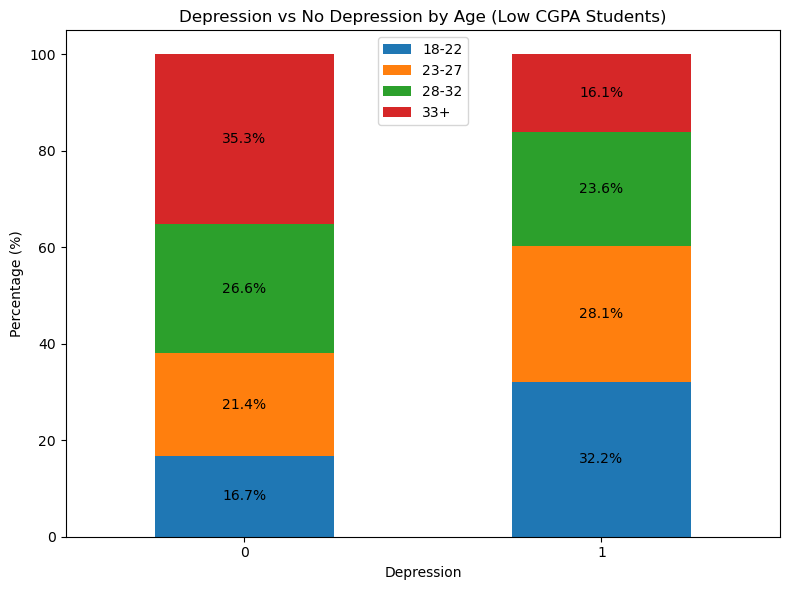

In [226]:
ax = low_cgpa_pivot.T.plot(
    kind='bar', stacked=True, figsize=(8, 6)
)

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Depression')
ax.set_title('Depression vs No Depression by Age (Low CGPA Students)')
ax.set_xticklabels([0,1],rotation=0)
ax.legend(age_labels, loc='upper center')

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

Filtering for students with CGPA below 6.5 did not reveal additional differences in depression prevalence across age groups.<br>
Even after removing the CGPA filter, the trend remained largely the same: younger students (18–22) showed a higher depression rate compared to older students (33+).<br>
This indicates that low CGPA alone is not a strong differentiator of depression risk within age groups, and age itself appears to have a stronger influence.

---

**What are the top 5 cities by depression rate, and how does the depression distribution differ by gender in these cities?**

In [227]:
city_depr = depr_df.groupby('City')['Depression'].agg(['sum','count'])
city_depr['Depression Rate (%)'] = ((city_depr['sum']/city_depr['count'])*100).round(2)
top5_cities = city_depr.sort_values(by='Depression Rate (%)', ascending=False).head(5).index.tolist()

#
city_gen_depr = depr_df[depr_df['City'].isin(top5_cities)].groupby(['City','Gender'])['Depression'].agg(['sum','count'])
city_gen_depr['Depression Rate (%)'] = ((city_gen_depr['sum']/city_gen_depr['count'])*100).round(2)
city_gen_depr

sum  count  Depression Rate (%)
City      Gender                                 
Ahmedabad Female  261    400                65.25
          Male    371    542                68.45
Bhopal    Female  266    418                63.64
          Male    310    512                60.55
Hyderabad Female  333    503                66.20
          Male    562    833                67.47
Patna     Female  255    389                65.55
          Male    379    613                61.83
Rajkot    Female  182    289                62.98
          Male    325    523                62.14

(0.0, 100.0)

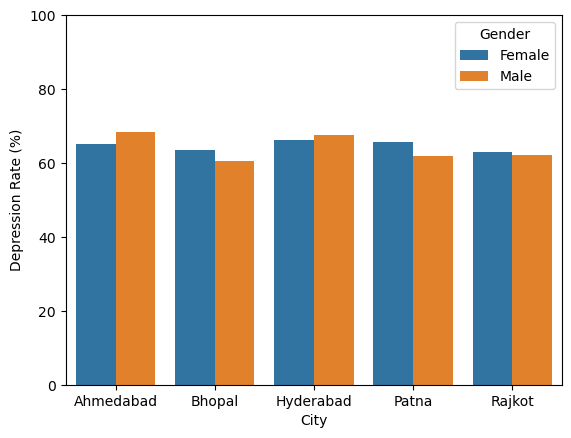

In [228]:
sns.barplot(
    data=city_gen_depr,
    x='City',
    y='Depression Rate (%)',
    hue='Gender'
)
plt.ylim(0,100)

The top 5 cities **(Ahmedabad, Bhopal, Hyderabad, Patna, Rajkot)** have high depression rates estimated upto **60%**, with minimal gender differences, indicating depression is widespread across both genders in these locations.

---

**Among students pursuing different degree programs, which groups report higher depression rates?**

### Multivariate Analysis

### **Data Pre-Processing**

### **Prediction**

### **Conclusion**